In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression as lrs 

In [8]:
import duckdb as dkb

In [9]:
data = pd.read_csv(r"C:\Users\huysi\Downloads\stack-overflow-developer-survey-2025\survey_results_public.csv")
data.head(5)

C:\Users\huysi\AppData\Local\Temp\ipykernel_25924\382666126.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\huysi\Downloads\stack-overflow-developer-survey-2025\survey_results_public.csv")


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [10]:
query1 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' >=65') AS Age, count(ResponseID) as 'Number of Responses'
    from data
    where Age != 'Prefer not to say'
    group by Age
    order by Age desc
        """

con = dkb.connect()
result1 = con.sql(query1).df()
result1

,Age,Number of Responses
0,55-64,2626
1,45-54,6265
2,35-44,13232
3,25-34,16485
4,18-24,9195
5,>=65,942


In [11]:
labels = result1['Age']
size = result1['Number of Responses']

In [12]:
text_properties = {
    'fontsize': 16,      # Increase font size
    'fontweight': 'semi-bold' # Set font weight
}

# Customize wedge (slice) properties (for borders)
wedge_properties = {
    'linewidth': 0.4,        # Set border width
    'edgecolor': 'black' # Set border color
}

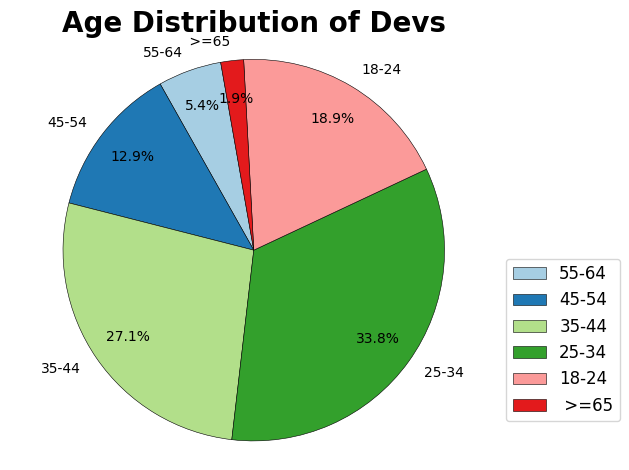

In [13]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.title('Age Distribution of Devs', fontsize = 20, fontweight = 'bold')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()